Importing basic necessary libraries

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

Importing the dataset

In [34]:
dataset = pd.read_csv('breast_cancer.csv')

Analysing the dataset

In [24]:
dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Separating the dependent and independent variables

In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into training and evaluation sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Initializing the Support Vector Classifier model

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Prediction and evaluation of the support 

In [8]:
prediction = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
con_matrix = confusion_matrix(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

In [10]:
con_matrix

array([[83,  4],
       [ 1, 49]])

In [39]:
print(f"The accuracy of the support vector classifier is {round(accuracy*100, 2)}%")

The accuracy of the support vector classifier is 96.35%


Visualizing results from the SVC

/var/folders/rp/6c2v596n3l1cycjj794dzpdc0000gn/T/ipykernel_1279/1086514116.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, feature_1], X_test[y_test == j, feature_2],


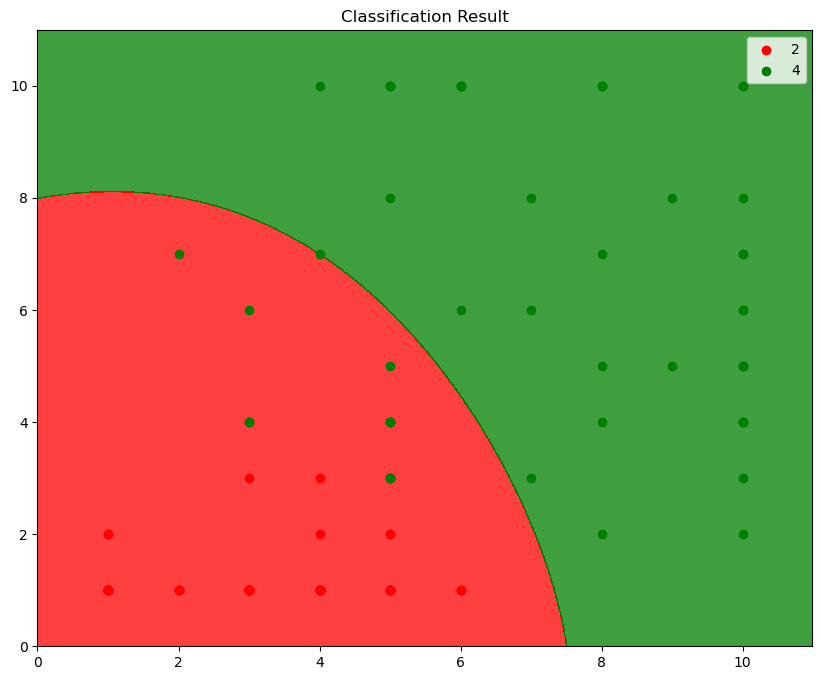

In [41]:
feature_1 = 0
feature_2 = 1

X1, X2 = np.meshgrid(np.arange(start=X_test[:, feature_1].min() - 1, stop=X_test[:, feature_1].max() + 1, step=0.01),
                     np.arange(start=X_test[:, feature_2].min() - 1, stop=X_test[:, feature_2].max() + 1, step=0.01))

mesh_points = np.c_[X1.ravel(), X2.ravel()]

X_test_mean = X_test.mean(axis=0)
X_mesh_full = np.tile(X_test_mean, (mesh_points.shape[0], 1))

X_mesh_full[:, feature_1] = mesh_points[:, 0]
X_mesh_full[:, feature_2] = mesh_points[:, 1]

Z = classifier.predict(X_mesh_full)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Z.reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, feature_1], X_test[y_test == j, feature_2], 
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classification Result')
plt.legend()
plt.show()

Initializing and training the Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state=0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Prediction using the random forest classification model

In [15]:
prediction1 = classifier1.predict(X_test)

Evaluation of the random forest classifier

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
con_matrix1 = confusion_matrix(y_test, prediction1)
accuracy1 = accuracy_score(y_test, prediction1)

In [19]:
con_matrix1

array([[84,  3],
       [ 1, 49]])

In [40]:
print(f"The accuracy of the random forest classification model in this use case is {round(accuracy1*100, 2)}%")

The accuracy of the random forest classification model in this use case is 97.08%


0.9708029197080292

Visualizing results from the random forest classifier

/var/folders/rp/6c2v596n3l1cycjj794dzpdc0000gn/T/ipykernel_1279/848056267.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, feature_1], X_test[y_test == j, feature_2],


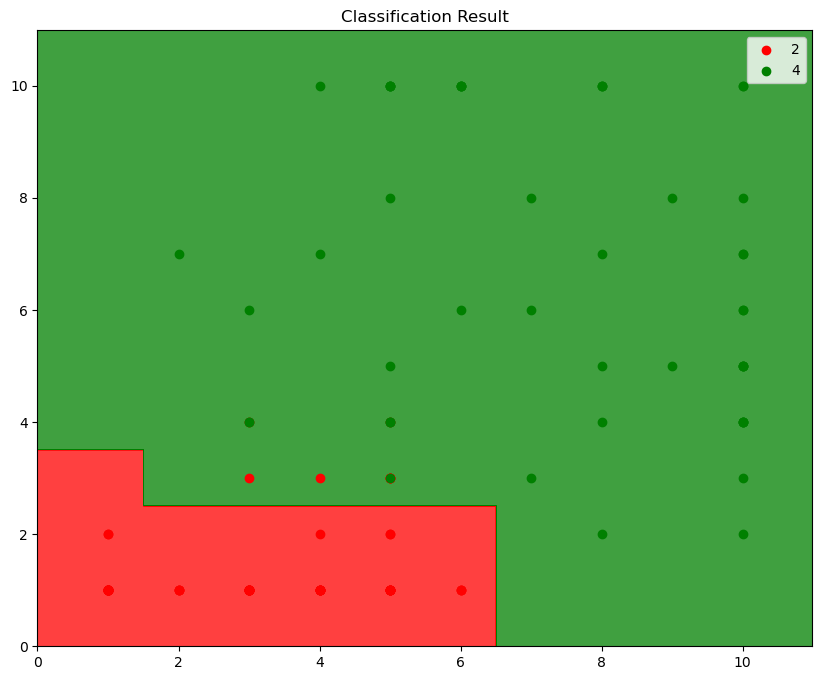

In [42]:
feature_1 = 0
feature_2 = 1

X1, X2 = np.meshgrid(np.arange(start=X_test[:, feature_1].min() - 1, stop=X_test[:, feature_1].max() + 1, step=0.01),
                     np.arange(start=X_test[:, feature_2].min() - 1, stop=X_test[:, feature_2].max() + 1, step=0.01))

mesh_points = np.c_[X1.ravel(), X2.ravel()]

X_test_mean = X_test.mean(axis=0)
X_mesh_full = np.tile(X_test_mean, (mesh_points.shape[0], 1))

X_mesh_full[:, feature_1] = mesh_points[:, 0]
X_mesh_full[:, feature_2] = mesh_points[:, 1]

Z = classifier1.predict(X_mesh_full)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Z.reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, feature_1], X_test[y_test == j, feature_2], 
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classification Result')
plt.legend()
plt.show()